In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [102]:
from funcs import prepare_dataframe

In [107]:
#functions
def double_roc(df1, title1, df2, title2):
    fpr1, tpr1, _ = roc_curve(df1['trueLabels'], df1['scores'])
    roc_auc1 = auc(fpr1, tpr1)
    fpr2, tpr2, _ = roc_curve(df2['trueLabels'], df2['scores'])
    roc_auc2 = auc(fpr2, tpr2)    
    plt.figure()
    lw = 2
    plt.plot(fpr1,
             tpr1,
             color="darkgreen",
             lw=lw,
             label=title1+"ROC curve (area = %0.2f)" % roc_auc1,
            )    
    plt.plot(fpr2,
             tpr2,
             color="darkorange",
             lw=lw,
             label=title2+"ROC curve (area = %0.2f)" % roc_auc2,
            ) 
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title('Classical vs Quantum')
    plt.legend(loc="lower right")
    plt.show()    
    
def single_roc(df, title):
    fpr, tpr, _ = roc_curve(df['trueLabels'], df['scores'])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr,
             tpr,
             color="darkorange",
             lw=lw,
             label="ROC curve (area = %0.2f)" % roc_auc,
            )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

def renameOutputFile(folder):
    """
    Remove config# from file names.
    """
    oldNames = []
    for file in os.listdir(folder):
        if fnmatch.fnmatch(file, '*config*'):
            oldNames.append(file)
    newNames = {}
    for oldName in oldNames:
        newName = oldName[:oldName.index('config')]+oldName[oldName.index('config')+8:]
        newNames[oldName] = newName
    for oldName, newName in newNames.items():
        os.rename(folder+oldName, folder+newName)
    
def getDataset(Quant, trainSize):
    """
    Quant (int): 0 or 1. 1 for quantum-enhanced model, and 0 for classical.
    trainSize (int)
    """
    
    fileName = 'output/resi'

In [78]:
df_Quant = pd.read_pickle('output/result_from_config3_Quant_trainSize10000.pkl')
df_Clas = pd.read_pickle('output/result_from_config4_Class_trainSize10000.pkl')

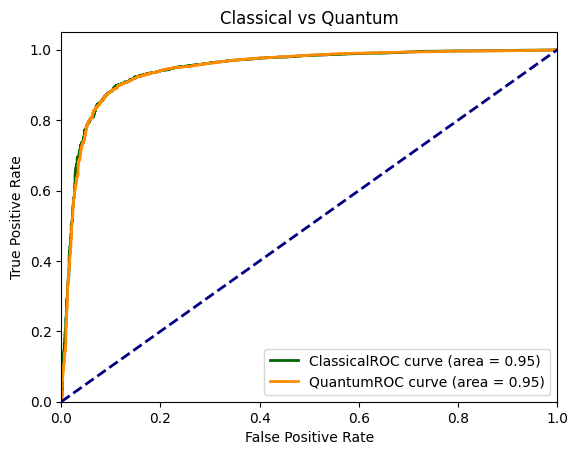

In [79]:
double_roc(df_Clas, 'Classical', df_Quant, 'Quantum')

In [63]:
df_Quant[(df_Quant['predictedLabels']==1)]

,K,C,A,S,G2,H,predictedLabels,trueLabels,scores
412,0.066112,0.223354,0.926956,0.898528,0.810115,0.769593,1,1,12.641425
514,0.010978,0.497476,0.968296,0.932389,0.606428,0.617526,1,1,1.603485
188,0.074628,0.372308,0.886635,0.692630,0.494801,0.593482,1,1,2.959225
993,0.036471,0.432367,0.946694,0.903461,0.663781,0.601700,1,1,2.830295
107,0.044395,0.324121,0.974561,0.924797,0.921069,0.861829,1,1,26.402246
...,...,...,...,...,...,...,...,...,...
145,0.135528,0.195299,0.751405,0.934455,0.819044,0.805446,1,1,32.287686
369,0.044429,0.362001,0.932946,0.884982,0.899169,0.791349,1,1,8.296772
626,0.015126,0.343262,0.969370,0.937286,0.487672,0.611666,1,1,4.139151
603,0.080451,0.431498,0.840171,0.821660,0.561341,0.589113,1,1,0.431596
